In [981]:
import pandas as pd
import requests
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
import datetime
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [982]:
fitbit_df = pd.read_pickle("Data/fitbit_all.pkl")

In [983]:
fitbit_df.tail()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active
Date,,,,,,,,,,
2018-08-23,10359,7.75889,3141,11,33,1454,710,159,38,52
2018-08-24,8696,6.51330,3216,17,51,1522,820,221,39,24
2018-08-25,165,0.12358,1977,0,0,109,757,15,0,0
2018-08-26,13286,11.05997,3080,25,76,1401,1247,103,9,81
2018-08-27,6360,4.76364,2801,8,24,1028,1254,134,29,23


In [984]:
mfp_exercise_df = pd.read_csv('Data/myfitnesspal/Exercise-Summary-2014-03-04-to-2018-08-29.csv') 
mfp_measurements_df = pd.read_csv('Data/myfitnesspal/Measurement-Summary-2014-03-04-to-2018-08-29.csv')
mfp_nutrition_df = pd.read_csv('Data/myfitnesspal/Nutrition-Summary-2014-03-04-to-2018-08-29.csv')

mfp_exercise_df.Date = pd.to_datetime(mfp_exercise_df.Date)
mfp_measurements_df.Date = pd.to_datetime(mfp_measurements_df.Date)
mfp_nutrition_df.Date = pd.to_datetime(mfp_nutrition_df.Date)

In [985]:
mfp_nutrition_df.head()

,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2014-03-04,Breakfast,603.8,36.1,11.7,3.9,8.7,0.0,764.2,602.4,252.5,4.0,0.0,3.2,39.4,19.3,0.6,14.3,37.2,NaN
1,2014-03-04,Lunch,540.0,24.0,6.0,0.0,0.0,0.0,0.0,185.0,0.0,37.0,3.0,25.0,10.0,0.0,0.0,4.0,8.0,NaN
2,2014-03-04,Dinner,895.7,7.7,5.2,0.3,0.3,0.0,0.0,2086.2,41.9,98.2,1.8,0.3,34.0,0.0,0.0,1.0,2.3,NaN
3,2014-03-05,Breakfast,603.8,36.1,11.7,3.9,8.7,0.0,764.2,602.4,252.5,4.0,0.0,3.2,39.4,19.3,0.6,14.3,37.2,NaN
4,2014-03-05,Lunch,540.0,24.0,6.0,0.0,0.0,0.0,0.0,185.0,0.0,37.0,3.0,25.0,10.0,0.0,0.0,4.0,8.0,NaN


In [986]:
mfp_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 20 columns):
Date                   2213 non-null datetime64[ns]
Meal                   2213 non-null object
Calories               2213 non-null float64
Fat (g)                2213 non-null float64
Saturated Fat          2213 non-null float64
Polyunsaturated Fat    2213 non-null float64
Monounsaturated Fat    2213 non-null float64
Trans Fat              2213 non-null float64
Cholesterol            2213 non-null float64
Sodium (mg)            2213 non-null float64
Potassium              2213 non-null float64
Carbohydrates (g)      2213 non-null float64
Fiber                  2213 non-null float64
Sugar                  2213 non-null float64
Protein (g)            2213 non-null float64
Vitamin A              2213 non-null float64
Vitamin C              2213 non-null float64
Calcium                2213 non-null float64
Iron                   2213 non-null float64
Note                   0 non-nul

In [987]:
mfp_nutrition_df_breakfast = mfp_nutrition_df[mfp_nutrition_df['Meal'] == 'Breakfast']

mfp_nutrition_df_breakfast = mfp_nutrition_df_breakfast.rename(columns = {'Calories':'Calories_Breakfast', 'Fat (g)': 'Fat_(g)_Breakfast',
                                             'Saturated Fat':'Saturated_Fat_Breakfast',
                                             'Polyunsaturated Fat':'Polyunsaturated_Fat_Breakfast',
                                             'Monounsaturated Fat':'Monounsaturated_Fat_Breakfast',
                                             'Trans Fat':'Trans_Fat_Breakfast', 'Cholesterol':'Cholesterol_Breakfast',
                                             'Sodium (mg)':'Sodium_(mg)_Breakfast', 'Potassium':'Potassium_Breakfast',
                                             'Carbohydrates (g)':'Carbohydrates_(g)_Breakfast', 'Fiber':'Fiber_Breakfast',
                                             'Sugar':'Sugar_Breakfast', 'Protein (g)':'Protein_(g)_Breakfast',
                                             'Vitamin A':'Vitamin_A_Breakfast', 'Vitamin C':'Vitamin_C_Breakfast',
                                             'Calcium':'Calcium_Breakfast', 'Iron':'Iron_Breakfast'})

mfp_nutrition_df_breakfast = mfp_nutrition_df_breakfast.drop(['Meal', 'Note'], axis=1)

mfp_nutrition_df_breakfast

,Date,Calories_Breakfast,Fat_(g)_Breakfast,Saturated_Fat_Breakfast,Polyunsaturated_Fat_Breakfast,Monounsaturated_Fat_Breakfast,Trans_Fat_Breakfast,Cholesterol_Breakfast,Sodium_(mg)_Breakfast,Potassium_Breakfast,Carbohydrates_(g)_Breakfast,Fiber_Breakfast,Sugar_Breakfast,Protein_(g)_Breakfast,Vitamin_A_Breakfast,Vitamin_C_Breakfast,Calcium_Breakfast,Iron_Breakfast
0,2014-03-04,603.8,36.1,11.7,3.9,8.7,0.0,764.2,602.4,252.5,4.0,0.0,3.2,39.4,19.3,0.6,14.3,37.2
3,2014-03-05,603.8,36.1,11.7,3.9,8.7,0.0,764.2,602.4,252.5,4.0,0.0,3.2,39.4,19.3,0.6,14.3,37.2
7,2014-03-06,525.0,38.8,13.5,5.2,11.6,0.0,888.9,1208.2,336.7,5.4,0.0,4.2,36.1,25.7,0.8,17.3,16.3
13,2014-03-08,855.0,26.0,2.1,2.1,2.0,0.0,1350.0,501.0,422.0,92.0,6.1,23.0,31.3,1.0,17.0,0.0,1.0
14,2014-03-09,405.0,16.5,2.3,0.0,0.0,0.1,70.0,590.0,284.0,32.0,1.0,5.5,33.0,11.0,9.0,7.5,14.0
17,2014-03-10,105.0,1.0,0.1,0.1,0.0,0.0,0.0,1.0,422.0,27.0,3.1,14.0,1.3,1.0,17.0,0.0,1.0
20,2014-03-11,240.0,1.0,0.0,0.0,0.0,0.0,0.0,400.0,110.0,56.0,2.0,18.0,4.0,20.0,20.0,20.0,50.0
23,2014-03-12,105.0,1.0,0.1,0.1,0.0,0.0,0.0,1.0,422.0,27.0,3.1,14.0,1.3,1.0,17.0,0.0,1.0
27,2014-03-14,120.0,3.0,0.5,0.0,0.0,0.0,0.0,110.0,0.0,24.0,3.0,12.0,2.0,15.0,0.0,20.0,10.0
30,2014-08-28,640.0,26.0,11.0,0.0,0.0,0.0,115.0,1525.0,0.0,70.0,4.0,7.0,28.0,6.0,0.0,15.0,25.0


In [988]:
mfp_nutrition_df_lunch = mfp_nutrition_df[mfp_nutrition_df['Meal'] == 'Lunch']

mfp_nutrition_df_lunch = mfp_nutrition_df_lunch.rename(columns = {'Calories':'Calories_Lunch', 'Fat (g)': 'Fat_(g)_Lunch',
                                             'Saturated Fat':'Saturated_Fat_Lunch',
                                             'Polyunsaturated Fat':'Polyunsaturated_Fat_Lunch',
                                             'Monounsaturated Fat':'Monounsaturated_Fat_Lunch',
                                             'Trans Fat':'Trans_Fat_Lunch', 'Cholesterol':'Cholesterol_Lunch',
                                             'Sodium (mg)':'Sodium_(mg)_Lunch', 'Potassium':'Potassium_Lunch',
                                             'Carbohydrates (g)':'Carbohydrates_(g)_Lunch', 'Fiber':'Fiber_Lunch',
                                             'Sugar':'Sugar_Lunch', 'Protein (g)':'Protein_(g)_Lunch',
                                             'Vitamin A':'Vitamin_A_Lunch', 'Vitamin C':'Vitamin_C_Lunch',
                                             'Calcium':'Calcium_Lunch', 'Iron':'Iron_Lunch'})

mfp_nutrition_df_lunch = mfp_nutrition_df_lunch.drop(['Meal', 'Note'], axis=1)


mfp_nutrition_df_lunch

,Date,Calories_Lunch,Fat_(g)_Lunch,Saturated_Fat_Lunch,Polyunsaturated_Fat_Lunch,Monounsaturated_Fat_Lunch,Trans_Fat_Lunch,Cholesterol_Lunch,Sodium_(mg)_Lunch,Potassium_Lunch,Carbohydrates_(g)_Lunch,Fiber_Lunch,Sugar_Lunch,Protein_(g)_Lunch,Vitamin_A_Lunch,Vitamin_C_Lunch,Calcium_Lunch,Iron_Lunch
1,2014-03-04,540.0,24.0,6.0,0.0,0.0,0.0,0.0,185.0,0.0,37.0,3.0,25.0,10.0,0.0,0.0,4.0,8.0
4,2014-03-05,540.0,24.0,6.0,0.0,0.0,0.0,0.0,185.0,0.0,37.0,3.0,25.0,10.0,0.0,0.0,4.0,8.0
8,2014-03-06,175.0,5.0,1.3,0.0,0.0,0.0,37.5,2250.0,0.0,22.5,2.5,0.0,7.5,5.0,0.0,0.0,5.0
11,2014-03-07,514.8,18.2,9.8,0.3,2.9,0.0,125.2,1449.1,482.8,1.0,1.2,2.3,41.4,110.0,13.8,42.7,19.0
15,2014-03-09,360.0,12.0,7.0,0.0,1.0,0.0,30.0,640.0,0.0,42.8,2.0,6.0,15.5,6.0,0.0,26.5,8.0
18,2014-03-10,365.0,18.5,8.5,0.0,0.0,0.0,90.0,690.0,409.0,22.0,9.0,4.0,38.0,24.0,124.0,15.0,8.0
21,2014-03-11,275.0,18.0,11.2,0.5,5.2,0.0,82.2,1028.4,58.8,1.5,0.0,0.0,30.5,15.0,3.0,40.0,5.0
24,2014-03-12,700.8,30.5,9.3,0.0,0.0,0.0,140.0,2330.0,409.0,53.7,12.3,9.0,59.7,82.3,157.3,18.3,18.0
28,2014-03-14,417.5,23.8,8.5,0.0,0.0,0.0,90.0,830.0,409.0,22.0,9.0,4.0,38.0,24.0,124.0,15.0,8.0
32,2014-08-29,470.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.5,6.5,0.0,0.0,0.0,0.0


In [989]:
mfp_nutrition_df_dinner = mfp_nutrition_df[mfp_nutrition_df['Meal'] == 'Dinner']

mfp_nutrition_df_dinner = mfp_nutrition_df_dinner.rename(columns = {'Calories':'Calories_Dinner', 'Fat (g)': 'Fat_(g)_Dinner',
                                             'Saturated Fat':'Saturated_Fat_Dinner',
                                             'Polyunsaturated Fat':'Polyunsaturated_Fat_Dinner',
                                             'Monounsaturated Fat':'Monounsaturated_Fat_Dinner',
                                             'Trans Fat':'Trans_Fat_Dinner', 'Cholesterol':'Cholesterol_Dinner',
                                             'Sodium (mg)':'Sodium_(mg)_Dinner', 'Potassium':'Potassium_Dinner',
                                             'Carbohydrates (g)':'Carbohydrates_(g)_Dinner', 'Fiber':'Fiber_Dinner',
                                             'Sugar':'Sugar_Dinner', 'Protein (g)':'Protein_(g)_Dinner',
                                             'Vitamin A':'Vitamin_A_Dinner', 'Vitamin C':'Vitamin_C_Dinner',
                                             'Calcium':'Calcium_Dinner', 'Iron':'Iron_Dinner'})

mfp_nutrition_df_dinner = mfp_nutrition_df_dinner.drop(['Meal', 'Note'], axis=1)

mfp_nutrition_df_dinner

,Date,Calories_Dinner,Fat_(g)_Dinner,Saturated_Fat_Dinner,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Potassium_Dinner,Carbohydrates_(g)_Dinner,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner
2,2014-03-04,895.7,7.7,5.2,0.3,0.3,0.0,0.0,2086.2,41.9,98.2,1.8,0.3,34.0,0.0,0.0,1.0,2.3
5,2014-03-05,542.8,16.7,6.0,0.1,0.0,0.0,144.0,123.3,246.2,7.3,2.1,3.8,24.5,14.5,9.9,4.8,33.6
9,2014-03-06,320.0,3.1,0.5,0.0,0.0,0.0,65.0,1876.0,556.0,36.0,3.5,34.7,35.2,25.0,135.0,7.0,25.0
12,2014-03-07,560.0,42.0,16.0,0.0,0.0,3.0,160.0,680.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,8.0,20.0
16,2014-03-09,350.4,4.3,0.7,0.2,0.1,0.0,81.3,102.4,774.1,42.8,4.1,9.0,36.9,6.1,140.1,4.3,10.5
19,2014-03-10,917.7,34.7,11.1,0.2,0.2,0.0,330.0,2036.2,68.0,43.0,12.7,11.3,119.1,18.4,59.6,27.5,31.5
22,2014-03-11,595.0,6.9,2.4,0.1,0.1,0.0,154.4,661.5,615.2,55.0,3.3,27.6,77.9,12.0,125.7,14.4,24.7
25,2014-03-12,187.5,4.2,1.0,2.0,1.0,0.0,0.0,472.3,222.7,30.2,2.3,2.2,5.6,21.1,104.3,0.6,16.5
29,2014-03-14,546.6,27.8,7.0,2.2,1.9,0.0,94.7,1291.8,520.2,30.4,1.9,1.3,38.4,8.5,3.4,19.8,19.1
37,2015-05-24,1152.0,80.0,16.0,0.0,0.0,0.0,416.0,1056.0,0.0,16.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0


In [990]:
mfp_nutrition_df_snacks = mfp_nutrition_df[mfp_nutrition_df['Meal'] == 'Snacks']

mfp_nutrition_df_snacks = mfp_nutrition_df_snacks.rename(columns = {'Calories':'Calories_Snacks', 'Fat (g)': 'Fat_(g)_Snacks',
                                             'Saturated Fat':'Saturated_Fat_Snacks',
                                             'Polyunsaturated Fat':'Polyunsaturated_Fat_Snacks',
                                             'Monounsaturated Fat':'Monounsaturated_Fat_Snacks',
                                             'Trans Fat':'Trans_Fat_Snacks', 'Cholesterol':'Cholesterol_Snacks',
                                             'Sodium (mg)':'Sodium_(mg)_Snacks', 'Potassium':'Potassium_Snacks',
                                             'Carbohydrates (g)':'Carbohydrates_(g)_Snacks', 'Fiber':'Fiber_Snacks',
                                             'Sugar':'Sugar_Snacks', 'Protein (g)':'Protein_(g)_Snacks',
                                             'Vitamin A':'Vitamin_A_Snacks', 'Vitamin C':'Vitamin_C_Snacks',
                                             'Calcium':'Calcium_Snacks', 'Iron':'Iron_Snacks'})

mfp_nutrition_df_snacks = mfp_nutrition_df_snacks.drop(['Meal', 'Note'], axis=1)


mfp_nutrition_df_snacks

,Date,Calories_Snacks,Fat_(g)_Snacks,Saturated_Fat_Snacks,Polyunsaturated_Fat_Snacks,Monounsaturated_Fat_Snacks,Trans_Fat_Snacks,Cholesterol_Snacks,Sodium_(mg)_Snacks,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks
6,2014-03-05,110.0,2.5,1.5,0.0,1.0,0.0,0.0,130.0,115.0,21.0,2.0,14.0,1.0,0.0,0.0,30.0,6.0
10,2014-03-06,810.0,33.0,15.0,1.0,1.0,0.0,70.0,755.0,230.0,115.0,7.0,74.0,21.0,42.0,20.0,74.0,56.0
26,2014-03-12,600.0,22.5,2.5,10.0,10.0,0.0,0.0,250.0,0.0,105.0,10.0,0.0,10.0,0.0,0.0,20.0,0.0
38,2015-05-24,156.3,12.5,2.2,0.0,0.0,0.0,0.0,65.6,0.0,6.9,1.9,2.5,5.6,0.0,0.0,1.3,3.8
50,2015-05-28,420.0,4.5,1.0,0.0,0.0,0.0,7.5,560.0,260.0,48.0,3.0,25.0,45.5,0.0,70.0,40.0,31.0
56,2015-05-30,480.0,6.0,2.0,0.0,0.0,0.0,0.0,400.0,520.0,90.0,6.0,50.0,16.0,0.0,140.0,50.0,50.0
59,2015-06-03,420.0,4.5,1.0,0.0,0.0,0.0,7.5,560.0,260.0,48.0,3.0,25.0,45.5,0.0,70.0,40.0,31.0
67,2015-06-08,1446.0,57.4,16.2,0.6,4.0,0.0,73.6,1230.2,1998.0,122.2,12.0,83.0,119.2,31.6,32.4,119.6,29.2
69,2015-06-16,240.0,3.0,1.0,0.0,0.0,0.0,0.0,200.0,260.0,45.0,3.0,25.0,8.0,0.0,70.0,25.0,25.0
74,2015-06-24,240.0,3.0,1.0,0.0,0.0,0.0,0.0,200.0,260.0,45.0,3.0,25.0,8.0,0.0,70.0,25.0,25.0


In [991]:
mfp_nutrition_df = mfp_nutrition_df.groupby('Date', as_index=False)[['Calories', 'Fat (g)', 'Saturated Fat', 'Polyunsaturated Fat',
                               'Monounsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium (mg)',
                               'Potassium', 'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)',
                               'Vitamin A', 'Vitamin C', 'Calcium', 'Iron']].sum()

In [992]:
mfp_nutrition_df = mfp_nutrition_df.merge(mfp_nutrition_df_breakfast, left_on='Date', right_on='Date', how='left')
mfp_nutrition_df = mfp_nutrition_df.merge(mfp_nutrition_df_lunch, left_on='Date', right_on='Date', how='left')
mfp_nutrition_df = mfp_nutrition_df.merge(mfp_nutrition_df_dinner, left_on='Date', right_on='Date', how='left')
mfp_nutrition_df = mfp_nutrition_df.merge(mfp_nutrition_df_snacks, left_on='Date', right_on='Date', how='left')

mfp_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 86 columns):
Date                             801 non-null datetime64[ns]
Calories                         801 non-null float64
Fat (g)                          801 non-null float64
Saturated Fat                    801 non-null float64
Polyunsaturated Fat              801 non-null float64
Monounsaturated Fat              801 non-null float64
Trans Fat                        801 non-null float64
Cholesterol                      801 non-null float64
Sodium (mg)                      801 non-null float64
Potassium                        801 non-null float64
Carbohydrates (g)                801 non-null float64
Fiber                            801 non-null float64
Sugar                            801 non-null float64
Protein (g)                      801 non-null float64
Vitamin A                        801 non-null float64
Vitamin C                        801 non-null float64
Calcium                 

In [993]:
mfp_nutrition_df.sort_values(by=['Date'])

mfp_nutrition_df.tail(100)

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Sodium_(mg)_Snacks,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks
701,2018-05-02,1327.0,44.7,12.7,2.2,3.5,0.0,105.0,2005.3,321.7,...,415.3,36.7,46.9,2.0,10.7,7.0,0.0,0.0,1.3,4.0
702,2018-05-03,1598.7,82.9,28.2,4.3,10.9,0.4,721.9,2878.8,811.3,...,170.0,0.0,13.0,2.0,9.0,6.0,0.0,0.0,0.0,0.0
703,2018-05-04,373.7,22.2,10.5,1.2,4.3,0.0,182.0,728.3,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,2018-05-05,606.3,42.7,17.9,5.5,15.1,0.6,631.4,1600.1,902.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,2018-05-07,1091.8,57.9,16.3,9.9,8.7,0.0,627.0,2284.6,308.0,...,406.3,0.0,15.0,0.6,2.5,1.9,1.3,2.5,0.0,1.3
706,2018-05-08,1672.2,69.8,15.2,0.0,1.5,0.0,246.7,2179.2,534.3,...,120.0,0.0,27.0,1.0,16.0,3.0,0.0,0.0,0.0,0.0
707,2018-05-09,1958.9,85.3,27.7,4.1,9.9,0.3,731.2,2917.7,973.7,...,720.0,17.5,6.5,1.5,2.0,24.5,5.0,0.0,36.5,3.0
708,2018-05-10,752.1,28.8,0.5,3.3,2.3,0.0,0.0,1492.5,987.1,...,53.3,0.0,5.3,0.3,0.3,0.7,0.0,0.7,0.7,0.0
709,2018-05-11,597.2,28.1,11.1,3.3,9.1,0.3,415.9,1117.8,742.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,2018-05-12,816.0,27.0,10.0,0.0,0.0,0.0,285.0,912.0,236.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [994]:
mfp_measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
Date                            575 non-null datetime64[ns]
Fitbit steps                    18 non-null float64
Fitbit tracked sleep minutes    15 non-null float64
Weight                          565 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 18.0 KB


In [995]:
mfp_measurements_df.tail(100)

,Date,Fitbit steps,Fitbit tracked sleep minutes,Weight
475,2018-04-21,NaN,NaN,186.6
476,2018-04-22,NaN,NaN,189.4
477,2018-04-23,NaN,NaN,190.4
478,2018-04-24,NaN,NaN,185.8
479,2018-04-25,NaN,NaN,186.0
480,2018-04-26,NaN,NaN,185.2
481,2018-04-27,NaN,NaN,185.8
482,2018-04-28,NaN,NaN,184.6
483,2018-04-29,NaN,NaN,188.2
484,2018-04-30,NaN,NaN,191.0


<Figure size 1500x1000 with 0 Axes>

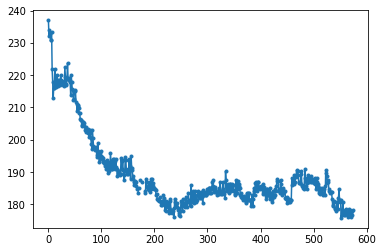

<Figure size 1500x1000 with 0 Axes>

In [996]:
mfp_measurements_df.Weight.plot(style='.-')
plt.figure(dpi=250)

In [997]:
fitbit_df.reset_index(inplace=True)
fitbit_df.tail()

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active
615,2018-08-23,10359,7.75889,3141,11,33,1454,710,159,38,52
616,2018-08-24,8696,6.51330,3216,17,51,1522,820,221,39,24
617,2018-08-25,165,0.12358,1977,0,0,109,757,15,0,0
618,2018-08-26,13286,11.05997,3080,25,76,1401,1247,103,9,81
619,2018-08-27,6360,4.76364,2801,8,24,1028,1254,134,29,23


In [998]:
len(fitbit_df[fitbit_df['Steps'] < 500])

59

In [999]:
fitbit_df['Day_of_week'] = fitbit_df['Date'].dt.day_name()

In [1000]:
day_of_week_df = fitbit_df.groupby(fitbit_df.Day_of_week)[['Steps', 'Distance', 'Calories_Burned',
                                                                   'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Day_of_week']].mean()


day_of_week_df

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active
Day_of_week,,,,,,,,,,
Friday,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,16.202247
Monday,6743.966292,5.175902,2688.000000,4.640449,13.977528,869.786517,1076.584270,127.393258,9.348315,23.853933
Saturday,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,23.292135
Sunday,4782.921348,3.679812,2551.359551,5.146067,15.494382,702.179775,1088.224719,85.123596,12.157303,24.078652
Thursday,7365.511364,5.715491,2780.852273,4.420455,13.284091,857.477273,1028.068182,145.545455,6.340909,14.215909
Tuesday,7318.181818,5.671428,2738.647727,5.215909,15.704545,911.261364,1044.488636,148.397727,8.636364,17.397727
Wednesday,7112.386364,5.472372,2744.863636,3.909091,11.761364,899.102273,1024.886364,155.465909,7.477273,14.261364


In [1001]:
# REMOVE DAYS WHERE STEP COUNT IS OFF (WASN'T WEARING FITBIT ALL DAY OR AT ALL)

# fitbit_df[fitbit_df['Steps'] < 500] = np.nan

In [1002]:
cols = ['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active']


fitbit_df[cols] = fitbit_df[cols].replace({0:np.nan})

In [1003]:
fitbit_df

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Day_of_week
0,2016-12-16,NaN,NaN,1856.0,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,Friday
1,2016-12-17,NaN,NaN,1855.0,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,Saturday
2,2016-12-18,NaN,NaN,1855.0,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,Sunday
3,2016-12-19,NaN,NaN,1855.0,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,Monday
4,2016-12-20,NaN,NaN,1854.0,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,Tuesday
5,2016-12-21,NaN,NaN,1854.0,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,Wednesday
6,2016-12-22,NaN,NaN,1854.0,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,Thursday
7,2016-12-23,NaN,NaN,1853.0,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,Friday
8,2016-12-24,NaN,NaN,1853.0,NaN,NaN,NaN,1440.0,NaN,NaN,NaN,Saturday
9,2016-12-25,1178.0,0.88232,2074.0,3.0,9.0,268.0,1368.0,72.0,NaN,NaN,Sunday


In [1004]:
## FIXING FITBIT DATA

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in weekdays:
    fitbit_df.loc[(fitbit_df['Steps'].isna()) & (fitbit_df['Day_of_week'] == day), ['Calories_Burned']] = day_of_week_df.loc[[day],['Calories_Burned']]

    fitbit_df.loc[(fitbit_df['Steps'].isna()) & (fitbit_df['Day_of_week'] == day), ['Minutes_Sedentary']] = day_of_week_df.loc[[day],['Minutes_Sedentary']]

    fitbit_df.loc[(fitbit_df['Steps'].isna()) & (fitbit_df['Day_of_week'] == day)] = fitbit_df.loc[(fitbit_df['Steps'].isna()) & (fitbit_df['Day_of_week'] == day)].fillna(day_of_week_df.loc[day])

In [1005]:
fitbit_df.loc[(fitbit_df['Steps'].isna())]

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Day_of_week


In [1006]:
day_of_week_df.loc['Sunday']

Steps                     4782.921348
Distance                     3.679812
Calories_Burned           2551.359551
Floors                       5.146067
Elevation                   15.494382
Activity_Calories          702.179775
Minutes_Sedentary         1088.224719
Minutes_Lightly_Active      85.123596
Minutes_Fairly_Active       12.157303
Minutes_Very_Active         24.078652
Name: Sunday, dtype: float64

In [1007]:
mfp_nutrition_df['Day_of_week'] = mfp_nutrition_df['Date'].dt.day_name()

In [1008]:
day_of_week_mfp_df = mfp_nutrition_df.groupby(mfp_nutrition_df.Day_of_week)[['Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Calories_Snacks',
       'Fat_(g)_Snacks', 'Carbohydrates_(g)_Snacks', 'Sugar_Snacks',
       'Protein_(g)_Snacks']].mean()


day_of_week_mfp_df

,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),...,Calories_Dinner,Fat_(g)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,1251.053719,54.724793,15.098347,3.114876,5.204132,0.280992,230.287603,2117.716529,469.774380,117.623140,...,612.128571,26.658929,52.296429,9.191071,39.676786,292.346341,12.495122,33.385366,12.517073,10.817073
Monday,1489.732773,62.605882,17.691597,3.834454,7.310084,0.551261,295.258824,2543.989916,706.369748,135.295798,...,739.563768,27.105797,68.001449,6.204348,51.178261,221.117391,10.452174,21.695652,6.480435,10.554348
Saturday,1269.215116,55.369767,19.698837,3.303488,6.647674,0.365116,433.541860,2243.072093,588.972093,107.886047,...,686.482353,28.591176,59.961765,9.650000,42.591176,344.751429,11.185714,35.308571,13.011429,21.342857
Sunday,1467.959494,65.003797,19.427848,3.110127,7.111392,0.272152,399.824051,2556.473418,659.394937,138.043038,...,864.811628,41.697674,71.923256,10.444186,45.627907,356.828000,13.668000,41.356000,13.868000,18.912000
Thursday,1426.653435,60.080153,16.219084,3.826718,6.566412,0.255725,261.674809,2476.829771,568.529008,134.513740,...,611.545455,24.549351,50.418182,6.942857,47.597403,271.581356,11.220339,29.515254,8.476271,11.359322
Tuesday,1543.168939,64.329545,17.831818,4.123485,7.832576,0.152273,273.306818,2721.881818,692.835606,141.003788,...,713.279570,29.361290,60.343011,10.415054,44.429032,269.070370,12.029630,29.653704,9.768519,11.198148
Wednesday,1484.565414,61.024060,17.186466,3.646617,6.750376,0.138346,275.990977,2710.157895,715.296241,138.390977,...,653.856044,26.008791,56.232967,8.345055,42.856044,243.193750,9.639062,27.467188,6.229687,9.606250


In [1009]:
print('Dinner null: ', len(mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna())]))
print('Breakfast null: ', len(mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Breakfast'].isna())]))
print('Lunch null: ', len(mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Lunch'].isna())]))

Dinner null:  338
Breakfast null:  54
Lunch null:  122


In [1010]:
rows_wrong = 0

for index, row in mfp_nutrition_df.iterrows():
    if row['Calories'] != row['Calories_Breakfast'] + row['Calories_Lunch'] + row['Calories_Dinner'] + row['Calories_Snacks']:
        print(row['Calories'], row['Calories_Breakfast'], row['Calories_Lunch'], row['Calories_Dinner'], row['Calories_Snacks'])
        rows_wrong += 1
        break
    
rows_fixed

2039.5 603.8 540.0 895.7 nan


377

In [1011]:
len(mfp_nutrition_df)

801

In [1012]:
mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna())]

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week
4,2014-03-08,855.0,26.0,2.1,2.1,2.0,0.0,1350.0,501.0,422.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
10,2014-08-28,640.0,26.0,11.0,0.0,0.0,0.0,115.0,1525.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
11,2014-08-29,740.0,23.0,0.0,0.0,0.0,0.0,0.0,360.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
12,2014-09-04,1184.0,50.8,12.8,8.1,15.6,0.0,200.0,1648.3,1729.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
17,2015-05-28,1124.5,28.3,10.0,0.0,0.0,0.0,60.8,1749.3,336.4,...,260.0,48.0,3.0,25.0,45.5,0.0,70.0,40.0,31.0,Thursday
19,2015-05-30,1502.6,63.7,27.3,4.9,16.1,0.0,755.7,2715.8,958.6,...,520.0,90.0,6.0,50.0,16.0,0.0,140.0,50.0,50.0,Saturday
20,2015-06-01,560.0,19.0,8.0,0.0,0.0,0.0,85.0,1710.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday
21,2015-06-03,950.0,22.5,3.5,0.0,0.0,0.0,52.5,2180.0,260.0,...,260.0,48.0,3.0,25.0,45.5,0.0,70.0,40.0,31.0,Wednesday
23,2015-06-05,780.0,35.0,5.0,1.5,10.0,0.0,110.0,1695.0,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
24,2015-06-08,2816.0,117.4,30.7,0.6,4.0,0.0,118.6,3057.8,1998.0,...,1998.0,122.2,12.0,83.0,119.2,31.6,32.4,119.6,29.2,Monday


In [1013]:
## FIXING MyFitnessPal Dinner DATA

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in weekdays:
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Calories_Dinner']] = day_of_week_mfp_df.loc[day,'Calories_Dinner']

    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Fat_(g)_Dinner']] = day_of_week_mfp_df.loc[day,'Fat_(g)_Dinner']
    
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Carbohydrates_(g)_Dinner']] = day_of_week_mfp_df.loc[day,'Carbohydrates_(g)_Dinner']
    
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Sugar_Dinner']] = day_of_week_mfp_df.loc[day,'Sugar_Dinner']
    
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Protein_(g)_Dinner']] = day_of_week_mfp_df.loc[day,'Protein_(g)_Dinner']

In [1014]:
## FIXING MyFitnessPal Breakfast DATA

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in weekdays:
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Breakfast'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Calories_Breakfast']] = day_of_week_mfp_df.loc[day,'Calories_Breakfast']

    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Breakfast'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Fat_(g)_Breakfast']] = day_of_week_mfp_df.loc[day,'Fat_(g)_Breakfast']
    
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Breakfast'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Carbohydrates_(g)_Breakfast']] = day_of_week_mfp_df.loc[day,'Carbohydrates_(g)_Breakfast']
    
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Breakfast'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Sugar_Breakfast']] = day_of_week_mfp_df.loc[day,'Sugar_Breakfast']
    
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Breakfast'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Protein_(g)_Breakfast']] = day_of_week_mfp_df.loc[day,'Protein_(g)_Breakfast']

In [1015]:
## FIXING MyFitnessPal Lunch DATA

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in weekdays:
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Lunch'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Calories_Lunch']] = day_of_week_mfp_df.loc[day,'Calories_Lunch']

    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Lunch'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Fat_(g)_Lunch']] = day_of_week_mfp_df.loc[day,'Fat_(g)_Lunch']
    
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Lunch'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Carbohydrates_(g)_Lunch']] = day_of_week_mfp_df.loc[day,'Carbohydrates_(g)_Lunch']
    
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Lunch'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Sugar_Lunch']] = day_of_week_mfp_df.loc[day,'Sugar_Lunch']
    
    mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Lunch'].isna()) & (mfp_nutrition_df['Day_of_week'] == day), ['Protein_(g)_Lunch']] = day_of_week_mfp_df.loc[day,'Protein_(g)_Lunch']

In [1016]:
## FIXING MyFitnessPal Snacks DATA

mfp_nutrition_df['Calories_Snacks'].fillna(0, inplace=True)
mfp_nutrition_df['Fat_(g)_Snacks'].fillna(0, inplace=True)
mfp_nutrition_df['Carbohydrates_(g)_Snacks'].fillna(0, inplace=True)
mfp_nutrition_df['Sugar_Snacks'].fillna(0, inplace=True)
mfp_nutrition_df['Protein_(g)_Snacks'].fillna(0, inplace=True)

In [1017]:
mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna()) & (mfp_nutrition_df['Day_of_week'] == 'Sunday'), ['Calories_Dinner']]

,Calories_Dinner


In [1018]:
day_of_week_mfp_df.loc['Sunday','Calories_Dinner']

864.8116279069768

In [1019]:
day_of_week_mfp_df.loc[['Sunday']]

,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),...,Calories_Dinner,Fat_(g)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Sunday,1467.959494,65.003797,19.427848,3.110127,7.111392,0.272152,399.824051,2556.473418,659.394937,138.043038,...,864.811628,41.697674,71.923256,10.444186,45.627907,356.828,13.668,41.356,13.868,18.912


In [1020]:
mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna())]

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week


In [1021]:
mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Breakfast'].isna())]

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week


In [1022]:
mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Lunch'].isna())]

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week


In [1023]:
rows_fixed = 0

for index, row in mfp_nutrition_df.iterrows():
    if row['Calories'] != row['Calories_Breakfast'] + row['Calories_Lunch'] + row['Calories_Dinner'] + row['Calories_Snacks']:
        row['Calories'] = row['Calories_Breakfast'] + row['Calories_Lunch'] + row['Calories_Dinner'] + row['Calories_Snacks']
        rows_fixed += 1
    
rows_fixed

395

In [1024]:
len(mfp_nutrition_df)

801

In [1025]:
mfp_nutrition_df.loc[(mfp_nutrition_df['Calories_Dinner'].isna())]

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week


In [1026]:
mfp_nutrition_df.tail(40)

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week
761,2018-07-12,1145.0,52.5,15.3,0.0,0.0,0.0,217.5,1450.0,600.0,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Thursday
762,2018-07-13,1457.0,43.0,12.5,0.0,0.0,0.0,5.0,1101.0,90.0,...,90.0,54.0,3.0,16.0,15.0,0.0,0.0,8.0,12.0,Friday
763,2018-07-14,1259.4,78.3,30.4,5.5,24.8,0.5,719.1,2937.2,288.6,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Saturday
764,2018-07-15,1205.0,65.3,18.1,1.3,11.3,0.0,115.0,3737.5,65.3,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Sunday
765,2018-07-16,795.0,37.5,9.3,0.0,0.0,0.0,42.5,730.0,600.0,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Monday
766,2018-07-17,220.0,10.0,3.0,0.0,0.0,0.0,5.0,130.0,0.0,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Tuesday
767,2018-07-18,306.7,5.5,0.0,1.8,2.0,0.0,0.0,635.5,324.5,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Wednesday
768,2018-07-19,365.0,6.5,0.0,2.1,2.3,0.0,0.0,746.7,385.8,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Thursday
769,2018-07-23,1522.0,43.9,13.2,2.1,2.3,0.3,174.8,2562.2,385.8,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Monday
770,2018-07-24,1129.6,44.0,8.8,3.4,4.4,0.1,92.7,837.7,722.6,...,0.0,34.5,0.5,0.0,5.8,7.0,0.0,0.0,0.0,Tuesday


In [1027]:
fitbit_df.tail()

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Day_of_week
615,2018-08-23,10359.0,7.75889,3141.0,11.0,33.0,1454.0,710.0,159.0,38.0,52.0,Thursday
616,2018-08-24,8696.0,6.51330,3216.0,17.0,51.0,1522.0,820.0,221.0,39.0,24.0,Friday
617,2018-08-25,165.0,0.12358,1977.0,NaN,NaN,109.0,757.0,15.0,NaN,NaN,Saturday
618,2018-08-26,13286.0,11.05997,3080.0,25.0,76.0,1401.0,1247.0,103.0,9.0,81.0,Sunday
619,2018-08-27,6360.0,4.76364,2801.0,8.0,24.0,1028.0,1254.0,134.0,29.0,23.0,Monday


In [1028]:
mfp_nutrition_df.tail()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Potassium_Snacks,Carbohydrates_(g)_Snacks,Fiber_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week
796,2018-08-25,1972.4,79.8,17.9,4.8,8.3,0.0,297.1,3349.9,312.5,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Saturday
797,2018-08-26,1349.1,68.4,22.4,4.2,11.2,0.0,460.9,3940.4,343.7,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,Sunday
798,2018-08-27,2281.3,81.7,20.9,7.7,9.9,0.0,75.2,1419.5,762.7,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Monday
799,2018-08-28,2080.0,72.5,34.9,6.1,18.0,0.0,165.0,1249.5,485.0,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Tuesday
800,2018-08-29,1322.8,65.6,28.5,0.0,0.0,0.5,183.1,2866.3,0.0,...,0.0,5.3,0.2,4.5,1.0,0.0,0.0,3.0,0.0,Wednesday


In [1029]:
fitbit_mfp_df = fitbit_df.merge(mfp_nutrition_df, left_on='Date', right_on='Date', how='left')
fitbit_mfp_df = fitbit_mfp_df.merge(mfp_measurements_df, left_on='Date', right_on='Date', how='left')

In [1030]:
fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Dinner'].isna())]

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Sugar_Snacks,Protein_(g)_Snacks,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week_y,Fitbit steps,Fitbit tracked sleep minutes,Weight
0,2016-12-16,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-17,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-12-25,1178.000000,0.882320,2074.000000,3.000000,9.000000,268.000000,1368.000000,72.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1178.0,NaN,184.9
17,2017-01-02,4791.000000,4.045170,2617.000000,1.000000,3.000000,840.000000,829.000000,131.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4791.0,448.0,NaN
23,2017-01-08,4392.000000,3.289600,2579.000000,1.000000,3.000000,810.000000,773.000000,127.000000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4392.0,361.0,NaN
28,2017-01-13,13866.000000,11.136710,4086.000000,31.000000,94.000000,2606.000000,587.000000,266.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2017-01-14,5606.000000,4.198890,3502.000000,7.000000,21.000000,1685.000000,782.000000,193.000000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2017-01-15,4252.000000,3.184740,2722.000000,5.000000,15.000000,869.000000,841.000000,144.000000,21.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2017-01-21,2143.000000,1.605100,2186.000000,1.000000,3.000000,368.000000,852.000000,88.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2017-02-11,7368.000000,5.518630,2863.000000,1.000000,3.000000,1153.000000,760.000000,232.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1031]:
fitbit_mfp_df['Net_Calories'] = fitbit_mfp_df['Calories'] - fitbit_mfp_df['Calories_Burned']

fitbit_mfp_df['Day_of_week'] = fitbit_mfp_df['Date'].dt.day_name()

fitbit_mfp_df.tail()

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week_y,Fitbit steps,Fitbit tracked sleep minutes,Weight,Net_Calories,Day_of_week
615,2018-08-23,10359.0,7.75889,3141.0,11.0,33.0,1454.0,710.0,159.0,38.0,...,NaN,NaN,NaN,NaN,Thursday,NaN,NaN,178.0,-2706.0,Thursday
616,2018-08-24,8696.0,6.51330,3216.0,17.0,51.0,1522.0,820.0,221.0,39.0,...,NaN,NaN,NaN,NaN,Friday,NaN,NaN,176.0,-1432.3,Friday
617,2018-08-25,165.0,0.12358,1977.0,NaN,NaN,109.0,757.0,15.0,NaN,...,NaN,NaN,NaN,NaN,Saturday,NaN,NaN,NaN,-4.6,Saturday
618,2018-08-26,13286.0,11.05997,3080.0,25.0,76.0,1401.0,1247.0,103.0,9.0,...,0.0,0.0,6.0,0.0,Sunday,NaN,NaN,177.2,-1730.9,Sunday
619,2018-08-27,6360.0,4.76364,2801.0,8.0,24.0,1028.0,1254.0,134.0,29.0,...,NaN,NaN,NaN,NaN,Monday,NaN,NaN,176.6,-519.7,Monday


In [1032]:
## FIXING MyFitnessPal Dinner DATA for rows not originally included (Dates (all meals) were missed)

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in weekdays:
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Dinner'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Calories_Dinner']] = day_of_week_mfp_df.loc[day,'Calories_Dinner']

    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Dinner'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Fat_(g)_Dinner']] = day_of_week_mfp_df.loc[day,'Fat_(g)_Dinner']
    
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Dinner'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Carbohydrates_(g)_Dinner']] = day_of_week_mfp_df.loc[day,'Carbohydrates_(g)_Dinner']
    
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Dinner'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Sugar_Dinner']] = day_of_week_mfp_df.loc[day,'Sugar_Dinner']
    
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Dinner'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Protein_(g)_Dinner']] = day_of_week_mfp_df.loc[day,'Protein_(g)_Dinner']

In [1033]:
## FIXING MyFitnessPal Breakfast DATA for rows not originally included (Dates (all meals) were missed)

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in weekdays:
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Breakfast'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Calories_Breakfast']] = day_of_week_mfp_df.loc[day,'Calories_Breakfast']

    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Breakfast'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Fat_(g)_Breakfast']] = day_of_week_mfp_df.loc[day,'Fat_(g)_Breakfast']
    
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Breakfast'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Carbohydrates_(g)_Breakfast']] = day_of_week_mfp_df.loc[day,'Carbohydrates_(g)_Breakfast']
    
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Breakfast'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Sugar_Breakfast']] = day_of_week_mfp_df.loc[day,'Sugar_Breakfast']
    
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Breakfast'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Protein_(g)_Breakfast']] = day_of_week_mfp_df.loc[day,'Protein_(g)_Breakfast']

In [1034]:
## FIXING MyFitnessPal Lunch DATA for rows not originally included (Dates (all meals) were missed)

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in weekdays:
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Lunch'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Calories_Lunch']] = day_of_week_mfp_df.loc[day,'Calories_Lunch']

    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Lunch'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Fat_(g)_Lunch']] = day_of_week_mfp_df.loc[day,'Fat_(g)_Lunch']
    
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Lunch'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Carbohydrates_(g)_Lunch']] = day_of_week_mfp_df.loc[day,'Carbohydrates_(g)_Lunch']
    
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Lunch'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Sugar_Lunch']] = day_of_week_mfp_df.loc[day,'Sugar_Lunch']
    
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Lunch'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Protein_(g)_Lunch']] = day_of_week_mfp_df.loc[day,'Protein_(g)_Lunch']

In [1035]:
## FIXING MyFitnessPal Snacks DATA for rows not originally included (Dates (all meals) were missed)

fitbit_mfp_df['Calories_Snacks'].fillna(0, inplace=True)
fitbit_mfp_df['Fat_(g)_Snacks'].fillna(0, inplace=True)
fitbit_mfp_df['Carbohydrates_(g)_Snacks'].fillna(0, inplace=True)
fitbit_mfp_df['Sugar_Snacks'].fillna(0, inplace=True)
fitbit_mfp_df['Protein_(g)_Snacks'].fillna(0, inplace=True)

In [1036]:
rows_fixed = 0
index_list = []

for index, row in fitbit_mfp_df.iterrows():
    if row['Calories'] != row['Calories_Breakfast'] + row['Calories_Lunch'] + row['Calories_Dinner'] + row['Calories_Snacks']:
        index_list.append(index)
        rows_fixed += 1
    
rows_fixed

377

In [1037]:
index_list

[0,
 1,
 2,
 5,
 7,
 8,
 9,
 10,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 40,
 44,
 46,
 47,
 49,
 50,
 51,
 52,
 57,
 58,
 59,
 60,
 61,
 62,
 65,
 66,
 71,
 72,
 75,
 77,
 78,
 79,
 84,
 85,
 90,
 91,
 92,
 93,
 94,
 98,
 106,
 107,
 109,
 113,
 114,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 128,
 130,
 133,
 134,
 135,
 140,
 141,
 142,
 146,
 147,
 148,
 149,
 151,
 155,
 156,
 157,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 175,
 176,
 177,
 181,
 183,
 184,
 185,
 186,
 190,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 215,
 216,
 217,
 218,
 219,
 222,
 224,
 225,
 227,
 231,
 232,
 233,
 235,
 236,
 238,
 240,
 241,
 242,
 244,
 245,
 246,
 247,
 248,
 249,
 252,
 253,
 254,
 255,
 256,
 258,
 260,
 261,
 263,
 266,
 267,
 272,
 274,
 275,
 280,
 281,
 282,
 288,
 289,
 290,
 293,
 294,
 295,
 296,
 297,
 303,
 307,
 308,
 

In [1038]:
fitbit_mfp_df.iloc[index_list]['Calories'] = fitbit_mfp_df[['Calories_Breakfast', 'Calories_Lunch','Calories_Dinner', 'Calories_Snacks']].values.sum(axis=1)[index_list]

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1039]:
fitbit_mfp_df[['Calories_Breakfast', 'Calories_Lunch','Calories_Dinner', 'Calories_Snacks']].values.sum(axis=1)[index_list]

array([1599.91117372, 1895.58501961, 2367.80142383, 2156.29204396,
       1428.22857143, 1636.48235294, 2126.23065459, 1799.16376812,
       2100.94545455, 2091.09910714, 2118.35835294, 3518.04085868,
       1781.93300254, 1422.12857143, 2035.35835294, 2126.23065459,
       1893.9168    , 1599.91117372, 1895.58501961, 2126.23065459,
       2013.29997501, 1994.67956989, 1264.59491525, 2318.72857143,
       1895.58501961, 1739.81162791, 2176.85604396, 2877.41902669,
       1951.27956989, 1127.46171875, 1790.41206657, 2173.95835294,
       1993.00142383, 1943.46376812, 1895.58501961, 2126.23065459,
       1781.93300254, 1693.20616672, 1624.65376271, 1607.84545455,
       2443.00142383, 2684.16376812, 3052.576     , 2002.78979592,
       1637.836     , 1845.72857143, 1895.58501961, 2126.23065459,
       1994.48260229, 2255.45835294, 1639.5571698 , 1728.38260229,
       1789.08235294, 2126.23065459, 1926.86376812, 2167.22857143,
       2716.876     , 3113.22923077, 1062.67539683, 1895.58501

In [1040]:
fitbit_mfp_df.iloc[index_list]

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week_y,Fitbit steps,Fitbit tracked sleep minutes,Weight,Net_Calories,Day_of_week
0,2016-12-16,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
1,2016-12-17,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
2,2016-12-18,4782.921348,3.679812,2551.359551,5.146067,15.494382,702.179775,1088.224719,85.123596,12.157303,...,41.9,402.7,12.9,28.6,Sunday,NaN,NaN,NaN,-1806.559551,Sunday
5,2016-12-21,7112.386364,5.472372,2744.863636,3.909091,11.761364,899.102273,1024.886364,155.465909,7.477273,...,NaN,NaN,NaN,NaN,Wednesday,NaN,NaN,NaN,-1869.163636,Wednesday
7,2016-12-23,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,...,NaN,NaN,NaN,NaN,Friday,NaN,NaN,NaN,-2077.585393,Friday
8,2016-12-24,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,...,NaN,NaN,NaN,NaN,Saturday,NaN,NaN,NaN,-1727.471910,Saturday
9,2016-12-25,1178.000000,0.882320,2074.000000,3.000000,9.000000,268.000000,1368.000000,72.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,1178.0,NaN,184.9,NaN,Sunday
10,2016-12-26,4058.000000,3.039440,2629.000000,3.000000,9.000000,973.000000,750.000000,210.000000,8.000000,...,0.0,0.0,2.0,10.0,Monday,4058.0,466.0,NaN,-1569.400000,Monday
13,2016-12-29,6472.000000,4.847520,2775.000000,6.000000,18.000000,1054.000000,793.000000,141.000000,11.000000,...,NaN,NaN,NaN,NaN,Thursday,6472.0,439.0,NaN,-1285.600000,Thursday
14,2016-12-30,2989.000000,2.238760,2384.000000,NaN,NaN,495.000000,781.000000,120.000000,NaN,...,NaN,NaN,NaN,NaN,Friday,2989.0,535.0,187.4,-667.400000,Friday


In [1041]:
fitbit_mfp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 619
Columns: 103 entries, Date to Day_of_week
dtypes: datetime64[ns](1), float64(99), object(3)
memory usage: 503.8+ KB


In [1042]:
fitbit_mfp_df.tail(40)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week_y,Fitbit steps,Fitbit tracked sleep minutes,Weight,Net_Calories,Day_of_week
580,2018-07-19,7631.000000,5.715610,2956.000000,7.000000,21.000000,NaN,1440.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,Thursday,NaN,NaN,178.6,-2591.00000,Thursday
581,2018-07-20,15754.000000,12.803780,3544.000000,20.000000,60.000000,NaN,1440.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
582,2018-07-21,11485.000000,8.602260,3099.000000,11.000000,33.000000,NaN,1440.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
583,2018-07-22,4980.000000,3.730020,3192.000000,6.000000,18.000000,NaN,1440.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,NaN,Sunday
584,2018-07-23,10266.000000,8.684370,2987.000000,12.000000,36.000000,NaN,1440.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,Monday,NaN,NaN,184.6,-1465.00000,Monday
585,2018-07-24,9995.000000,7.486250,2940.000000,20.000000,60.000000,NaN,1440.000000,NaN,NaN,...,7.0,0.0,0.0,0.0,Tuesday,NaN,NaN,181.4,-1810.40000,Tuesday
586,2018-07-25,10743.000000,9.012610,2887.000000,14.000000,42.000000,NaN,1440.000000,NaN,NaN,...,0.0,30.0,2.0,2.0,Wednesday,NaN,NaN,180.8,-887.70000,Wednesday
587,2018-07-26,7830.000000,5.864670,2820.000000,14.000000,42.000000,NaN,1440.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,Thursday,NaN,NaN,181.2,-922.00000,Thursday
588,2018-07-27,4450.000000,3.333050,2444.000000,11.000000,33.000000,NaN,1440.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,Friday,NaN,NaN,NaN,-1769.00000,Friday
589,2018-07-28,4031.000000,3.019210,2237.000000,2.000000,6.000000,NaN,1440.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,Saturday,NaN,NaN,NaN,-977.00000,Saturday


In [1043]:
fitbit_mfp_df.loc[(fitbit_mfp_df['Calories_Dinner'].isna())]

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week_y,Fitbit steps,Fitbit tracked sleep minutes,Weight,Net_Calories,Day_of_week


In [1044]:
dow_df = fitbit_mfp_df.groupby(fitbit_mfp_df.Day_of_week)[['Calories']].mean()


dow_df

,Calories
Day_of_week,
Friday,1276.622222
Monday,1512.506494
Saturday,1179.976923
Sunday,1455.554545
Thursday,1505.762025
Tuesday,1578.055000
Wednesday,1555.049383


In [1045]:
## FIXING MyFitnessPal Dinner DATA for rows not originally included (Dates (all meals) were missed)

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in weekdays:
    fitbit_mfp_df.loc[(fitbit_mfp_df['Calories'].isna()) & (fitbit_mfp_df['Day_of_week'] == day), ['Calories']] = dow_df.loc[day,'Calories']

In [1046]:
fitbit_mfp_df.loc[(fitbit_mfp_df['Calories'].isna())]

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Vitamin_A_Snacks,Vitamin_C_Snacks,Calcium_Snacks,Iron_Snacks,Day_of_week_y,Fitbit steps,Fitbit tracked sleep minutes,Weight,Net_Calories,Day_of_week


In [1047]:
fitbit_mfp_df.drop(['Saturated_Fat_Breakfast','Saturated_Fat_Lunch','Saturated_Fat_Dinner','Saturated_Fat_Snacks',
 'Polyunsaturated_Fat_Breakfast','Polyunsaturated_Fat_Lunch','Polyunsaturated_Fat_Dinner','Polyunsaturated_Fat_Snacks',
 'Monounsaturated_Fat_Breakfast','Monounsaturated_Fat_Lunch','Monounsaturated_Fat_Dinner','Monounsaturated_Fat_Snacks',
 'Trans_Fat_Breakfast','Trans_Fat_Lunch','Trans_Fat_Dinner','Trans_Fat_Snacks',
 'Cholesterol_Breakfast','Cholesterol_Lunch','Cholesterol_Dinner','Cholesterol_Snacks',
 'Sodium_(mg)_Breakfast','Sodium_(mg)_Lunch','Sodium_(mg)_Dinner','Sodium_(mg)_Snacks',
 'Potassium_Breakfast','Potassium_Lunch','Potassium_Dinner','Potassium_Snacks',
 'Fiber_Breakfast','Fiber_Lunch','Fiber_Dinner','Fiber_Snacks',
 'Vitamin_A_Breakfast','Vitamin_A_Lunch','Vitamin_A_Dinner','Vitamin_A_Snacks',
 'Vitamin_C_Breakfast','Vitamin_C_Lunch','Vitamin_C_Dinner','Vitamin_C_Snacks',
 'Calcium_Breakfast','Calcium_Lunch','Calcium_Dinner','Calcium_Snacks',
 'Iron_Breakfast','Iron_Lunch','Iron_Dinner','Iron_Snacks', 'Fitbit steps', 'Fitbit tracked sleep minutes',
 'Day_of_week_x', 'Day_of_week_y'],
                   axis=1, inplace=True)

fitbit_mfp_df.set_index('Date', inplace=True)

fitbit_mfp_df.tail()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-23,10359.0,7.75889,3141.0,11.0,33.0,1454.0,710.0,159.0,38.0,52.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,178.0,-2706.0,Thursday
2018-08-24,8696.0,6.51330,3216.0,17.0,51.0,1522.0,820.0,221.0,39.0,24.0,...,0.0,51.3,0.0,0.0,0.0,0.0,0.0,176.0,-1432.3,Friday
2018-08-25,165.0,0.12358,1977.0,NaN,NaN,109.0,757.0,15.0,NaN,NaN,...,2.2,45.2,0.0,0.0,0.0,0.0,0.0,NaN,-4.6,Saturday
2018-08-26,13286.0,11.05997,3080.0,25.0,76.0,1401.0,1247.0,103.0,9.0,81.0,...,15.0,22.7,30.0,3.0,3.0,0.0,0.0,177.2,-1730.9,Sunday
2018-08-27,6360.0,4.76364,2801.0,8.0,24.0,1028.0,1254.0,134.0,29.0,23.0,...,6.0,30.6,0.0,0.0,0.0,0.0,0.0,176.6,-519.7,Monday


In [1048]:
fitbit_mfp_df.Weight = fitbit_mfp_df.Weight.interpolate(method='linear')

fitbit_mfp_df.head(50)

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,16.202247,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Friday
2016-12-17,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,23.292135,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Saturday
2016-12-18,4782.921348,3.679812,2551.359551,5.146067,15.494382,702.179775,1088.224719,85.123596,12.157303,24.078652,...,NaN,NaN,392.4,29.4,24.1,10.4,21.7,NaN,-1806.559551,Sunday
2016-12-19,6743.966292,5.175902,2688.000000,4.640449,13.977528,869.786517,1076.584270,127.393258,9.348315,23.853933,...,15.0,5.0,0.0,0.0,0.0,0.0,0.0,186.800000,-1493.100000,Monday
2016-12-20,7318.181818,5.671428,2738.647727,5.215909,15.704545,911.261364,1044.488636,148.397727,8.636364,17.397727,...,14.1,47.7,0.0,0.0,0.0,0.0,0.0,186.483333,-1038.947727,Tuesday
2016-12-21,7112.386364,5.472372,2744.863636,3.909091,11.761364,899.102273,1024.886364,155.465909,7.477273,14.261364,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,186.166667,-1869.163636,Wednesday
2016-12-22,7365.511364,5.715491,2780.852273,4.420455,13.284091,857.477273,1028.068182,145.545455,6.340909,14.215909,...,0.0,31.0,210.0,11.0,27.0,16.0,3.0,185.850000,-1069.352273,Thursday
2016-12-23,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,16.202247,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,185.533333,-2077.585393,Friday
2016-12-24,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,23.292135,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,185.216667,-1727.471910,Saturday


In [1049]:
fitbit_mfp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 620 entries, 2016-12-16 to 2018-08-27
Data columns (total 50 columns):
Steps                          620 non-null float64
Distance                       620 non-null float64
Calories_Burned                620 non-null float64
Floors                         508 non-null float64
Elevation                      508 non-null float64
Activity_Calories              541 non-null float64
Minutes_Sedentary              620 non-null float64
Minutes_Lightly_Active         541 non-null float64
Minutes_Fairly_Active          391 non-null float64
Minutes_Very_Active            386 non-null float64
Calories                       620 non-null float64
Fat (g)                        496 non-null float64
Saturated Fat                  496 non-null float64
Polyunsaturated Fat            496 non-null float64
Monounsaturated Fat            496 non-null float64
Trans Fat                      496 non-null float64
Cholesterol                    496 non-null 

In [1050]:
fitbit_mfp_df.head(40)

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,16.202247,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Friday
2016-12-17,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,23.292135,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Saturday
2016-12-18,4782.921348,3.679812,2551.359551,5.146067,15.494382,702.179775,1088.224719,85.123596,12.157303,24.078652,...,NaN,NaN,392.4,29.4,24.1,10.4,21.7,NaN,-1806.559551,Sunday
2016-12-19,6743.966292,5.175902,2688.000000,4.640449,13.977528,869.786517,1076.584270,127.393258,9.348315,23.853933,...,15.0,5.0,0.0,0.0,0.0,0.0,0.0,186.800000,-1493.100000,Monday
2016-12-20,7318.181818,5.671428,2738.647727,5.215909,15.704545,911.261364,1044.488636,148.397727,8.636364,17.397727,...,14.1,47.7,0.0,0.0,0.0,0.0,0.0,186.483333,-1038.947727,Tuesday
2016-12-21,7112.386364,5.472372,2744.863636,3.909091,11.761364,899.102273,1024.886364,155.465909,7.477273,14.261364,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,186.166667,-1869.163636,Wednesday
2016-12-22,7365.511364,5.715491,2780.852273,4.420455,13.284091,857.477273,1028.068182,145.545455,6.340909,14.215909,...,0.0,31.0,210.0,11.0,27.0,16.0,3.0,185.850000,-1069.352273,Thursday
2016-12-23,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,16.202247,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,185.533333,-2077.585393,Friday
2016-12-24,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,23.292135,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,185.216667,-1727.471910,Saturday


In [1051]:
fitbit_mfp_df.columns

Index(['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Calories_Snacks',
       'Fat_(g)_Snacks', 'Carbohydrates_(g)_Snacks', 'Sugar_Snacks',
       'Protein_(g)_Snacks', 'Weight', 'Net_Calories', 'Day_of_week'],
      dtype='objec

In [1052]:
day_of_week_df = fitbit_mfp_df.groupby(fitbit_mfp_df.Day_of_week)[['Steps', 'Distance', 'Calories_Burned',
                                                                   'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Calories_Snacks',
       'Fat_(g)_Snacks', 'Carbohydrates_(g)_Snacks', 'Sugar_Snacks',
       'Protein_(g)_Snacks', 'Weight', 'Net_Calories', 'Day_of_week']].mean()


day_of_week_df

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,8574.590077,6.579904,2975.503346,7.736995,23.264253,1320.395739,975.464714,225.480228,13.466292,24.303371,...,61.264516,6.461290,39.067742,63.929213,3.005618,7.343820,2.835955,2.067416,182.990285,-1666.471411
Monday,7274.390607,5.582995,2753.573034,5.939775,17.891236,1056.955767,1048.001010,154.806998,16.317058,42.406991,...,69.188095,5.502381,48.900000,57.226966,2.741573,5.692135,1.723596,2.538202,184.196181,-1228.000000
Saturday,6258.391491,4.806019,2788.883853,10.687741,32.317290,1024.693857,984.078273,134.352254,21.836354,39.208427,...,68.733333,11.827778,34.433333,59.721348,2.597753,5.101124,2.253933,3.842697,183.079041,-1535.759680
Sunday,5374.068931,4.134620,2637.864664,7.567746,22.785856,877.724719,1044.746875,106.404494,22.938308,44.590096,...,73.506897,12.613793,43.106897,67.044944,3.147191,6.546067,3.267416,3.588764,183.586358,-1115.132686
Thursday,7784.006327,6.040235,2833.593879,5.790173,17.400288,1063.271818,1004.662965,180.476364,11.126501,25.923128,...,52.270213,6.072340,51.757447,63.689773,2.900000,5.955682,2.622727,2.334091,183.071007,-1285.989988
Tuesday,7733.987603,5.993668,2789.070894,6.832106,20.570743,1100.614374,1022.016400,179.233619,15.748663,30.528087,...,53.630909,8.998182,46.065455,81.998864,3.645455,8.476136,3.886364,3.972727,183.974288,-1179.535483
Wednesday,7435.676653,5.721117,2785.471074,4.795152,14.427273,1088.386962,1006.017562,188.195574,12.979417,26.240909,...,57.493220,6.833898,39.322034,68.792045,2.604545,6.920455,1.773864,2.559091,183.384702,-1199.808081


In [1053]:
## FILL NA VALUES WITH MEAN OF THAT COLUMN BY THE DAY OF THE WEEK

#fitbit_mfp_df['Calories_Breakfast'].fillna((sub2['income'].mean()), inplace=True)

In [1054]:
day_of_week_df['Steps']['Friday']

8574.590077010478

In [1055]:
fitbit_mfp_df.loc[(fitbit_mfp_df['Steps'] == 0) & (fitbit_mfp_df['Day_of_week'] == 'Sunday')]

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,


In [1056]:
fitbit_mfp_df.columns

Index(['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Calories_Snacks',
       'Fat_(g)_Snacks', 'Carbohydrates_(g)_Snacks', 'Sugar_Snacks',
       'Protein_(g)_Snacks', 'Weight', 'Net_Calories', 'Day_of_week'],
      dtype='objec

In [1057]:
cols = ['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Calories_Snacks',
       'Fat_(g)_Snacks', 'Carbohydrates_(g)_Snacks', 'Sugar_Snacks',
       'Protein_(g)_Snacks']


fitbit_mfp_df[cols] = fitbit_mfp_df[cols].replace({0:np.nan})

In [1058]:
fitbit_mfp_df.loc[(fitbit_mfp_df['Steps'].isna()) & (fitbit_mfp_df['Day_of_week'] == 'Sunday')]

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,


In [1059]:
fitbit_mfp_df.Steps.loc[(fitbit_mfp_df['Steps'].isna()) & (fitbit_mfp_df['Day_of_week'] == 'Sunday')].fillna(day_of_week_df['Steps']['Sunday'].mean(), inplace=True)

Series([], Name: Steps, dtype: float64)

In [1060]:
fitbit_mfp_df.loc[(fitbit_mfp_df['Steps'].isna()) & (fitbit_mfp_df['Day_of_week'] == 'Sunday')]

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,


In [1061]:
fitbit_mfp_df[fitbit_mfp_df.Calories.isna()]['Calories_Dinner']

Series([], Name: Calories_Dinner, dtype: float64)

In [1062]:
fitbit_mfp_df.head(40)

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Sugar_Dinner,Protein_(g)_Dinner,Calories_Snacks,Fat_(g)_Snacks,Carbohydrates_(g)_Snacks,Sugar_Snacks,Protein_(g)_Snacks,Weight,Net_Calories,Day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,16.202247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
2016-12-17,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,23.292135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
2016-12-18,4782.921348,3.679812,2551.359551,5.146067,15.494382,702.179775,1088.224719,85.123596,12.157303,24.078652,...,NaN,NaN,392.4,29.4,24.1,10.4,21.7,NaN,-1806.559551,Sunday
2016-12-19,6743.966292,5.175902,2688.000000,4.640449,13.977528,869.786517,1076.584270,127.393258,9.348315,23.853933,...,15.0,5.0,NaN,NaN,NaN,NaN,NaN,186.800000,-1493.100000,Monday
2016-12-20,7318.181818,5.671428,2738.647727,5.215909,15.704545,911.261364,1044.488636,148.397727,8.636364,17.397727,...,14.1,47.7,NaN,NaN,NaN,NaN,NaN,186.483333,-1038.947727,Tuesday
2016-12-21,7112.386364,5.472372,2744.863636,3.909091,11.761364,899.102273,1024.886364,155.465909,7.477273,14.261364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.166667,-1869.163636,Wednesday
2016-12-22,7365.511364,5.715491,2780.852273,4.420455,13.284091,857.477273,1028.068182,145.545455,6.340909,14.215909,...,NaN,31.0,210.0,11.0,27.0,16.0,3.0,185.850000,-1069.352273,Thursday
2016-12-23,7949.359551,6.100120,2893.685393,6.528090,19.629213,1059.067416,1009.337079,180.853933,8.977528,16.202247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.533333,-2077.585393,Friday
2016-12-24,5514.820225,4.235007,2677.471910,7.089888,21.438202,781.202247,1038.247191,102.426966,13.404494,23.292135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.216667,-1727.471910,Saturday


In [1063]:
fitbit_mfp_df.to_pickle("Data/Fitbit_and_MFP_Cleaned.pkl")

In [1064]:
fmfp_df = fitbit_mfp_df[['Steps', 'Calories', 'Weight']]

fmfp_df.reset_index(inplace=True)

fmfp_df.head(50)

,Date,Steps,Calories,Weight
0,2016-12-16,7949.359551,1276.622222,NaN
1,2016-12-17,5514.820225,1179.976923,NaN
2,2016-12-18,4782.921348,744.800000,NaN
3,2016-12-19,6743.966292,1194.900000,186.800000
4,2016-12-20,7318.181818,1699.700000,186.483333
5,2016-12-21,7112.386364,875.700000,186.166667
6,2016-12-22,7365.511364,1711.500000,185.850000
7,2016-12-23,7949.359551,816.100000,185.533333
8,2016-12-24,5514.820225,950.000000,185.216667
9,2016-12-25,1178.000000,1455.554545,184.900000


In [1065]:
## INTERPOLATING WEIGHTS THAT ARE MISSING

fmfp_df.Weight = fmfp_df.Weight.interpolate(method='linear')
fmfp_df['Day_of_week'] = fmfp_df['Date'].dt.day_name()

fmfp_df.head(50)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Date,Steps,Calories,Weight,Day_of_week
0,2016-12-16,7949.359551,1276.622222,NaN,Friday
1,2016-12-17,5514.820225,1179.976923,NaN,Saturday
2,2016-12-18,4782.921348,744.800000,NaN,Sunday
3,2016-12-19,6743.966292,1194.900000,186.800000,Monday
4,2016-12-20,7318.181818,1699.700000,186.483333,Tuesday
5,2016-12-21,7112.386364,875.700000,186.166667,Wednesday
6,2016-12-22,7365.511364,1711.500000,185.850000,Thursday
7,2016-12-23,7949.359551,816.100000,185.533333,Friday
8,2016-12-24,5514.820225,950.000000,185.216667,Saturday
9,2016-12-25,1178.000000,1455.554545,184.900000,Sunday


In [1066]:
fmfp_df.groupby(fmfp_df.Day_of_week)[['Calories','Steps']].mean()

,Calories,Steps
Day_of_week,,
Friday,1276.622222,8574.590077
Monday,1512.506494,7274.390607
Saturday,1179.976923,6258.391491
Sunday,1455.554545,5374.068931
Thursday,1505.762025,7784.006327
Tuesday,1578.055000,7733.987603
Wednesday,1555.049383,7435.676653


Text(0.5,1,'Time Series of Weight')

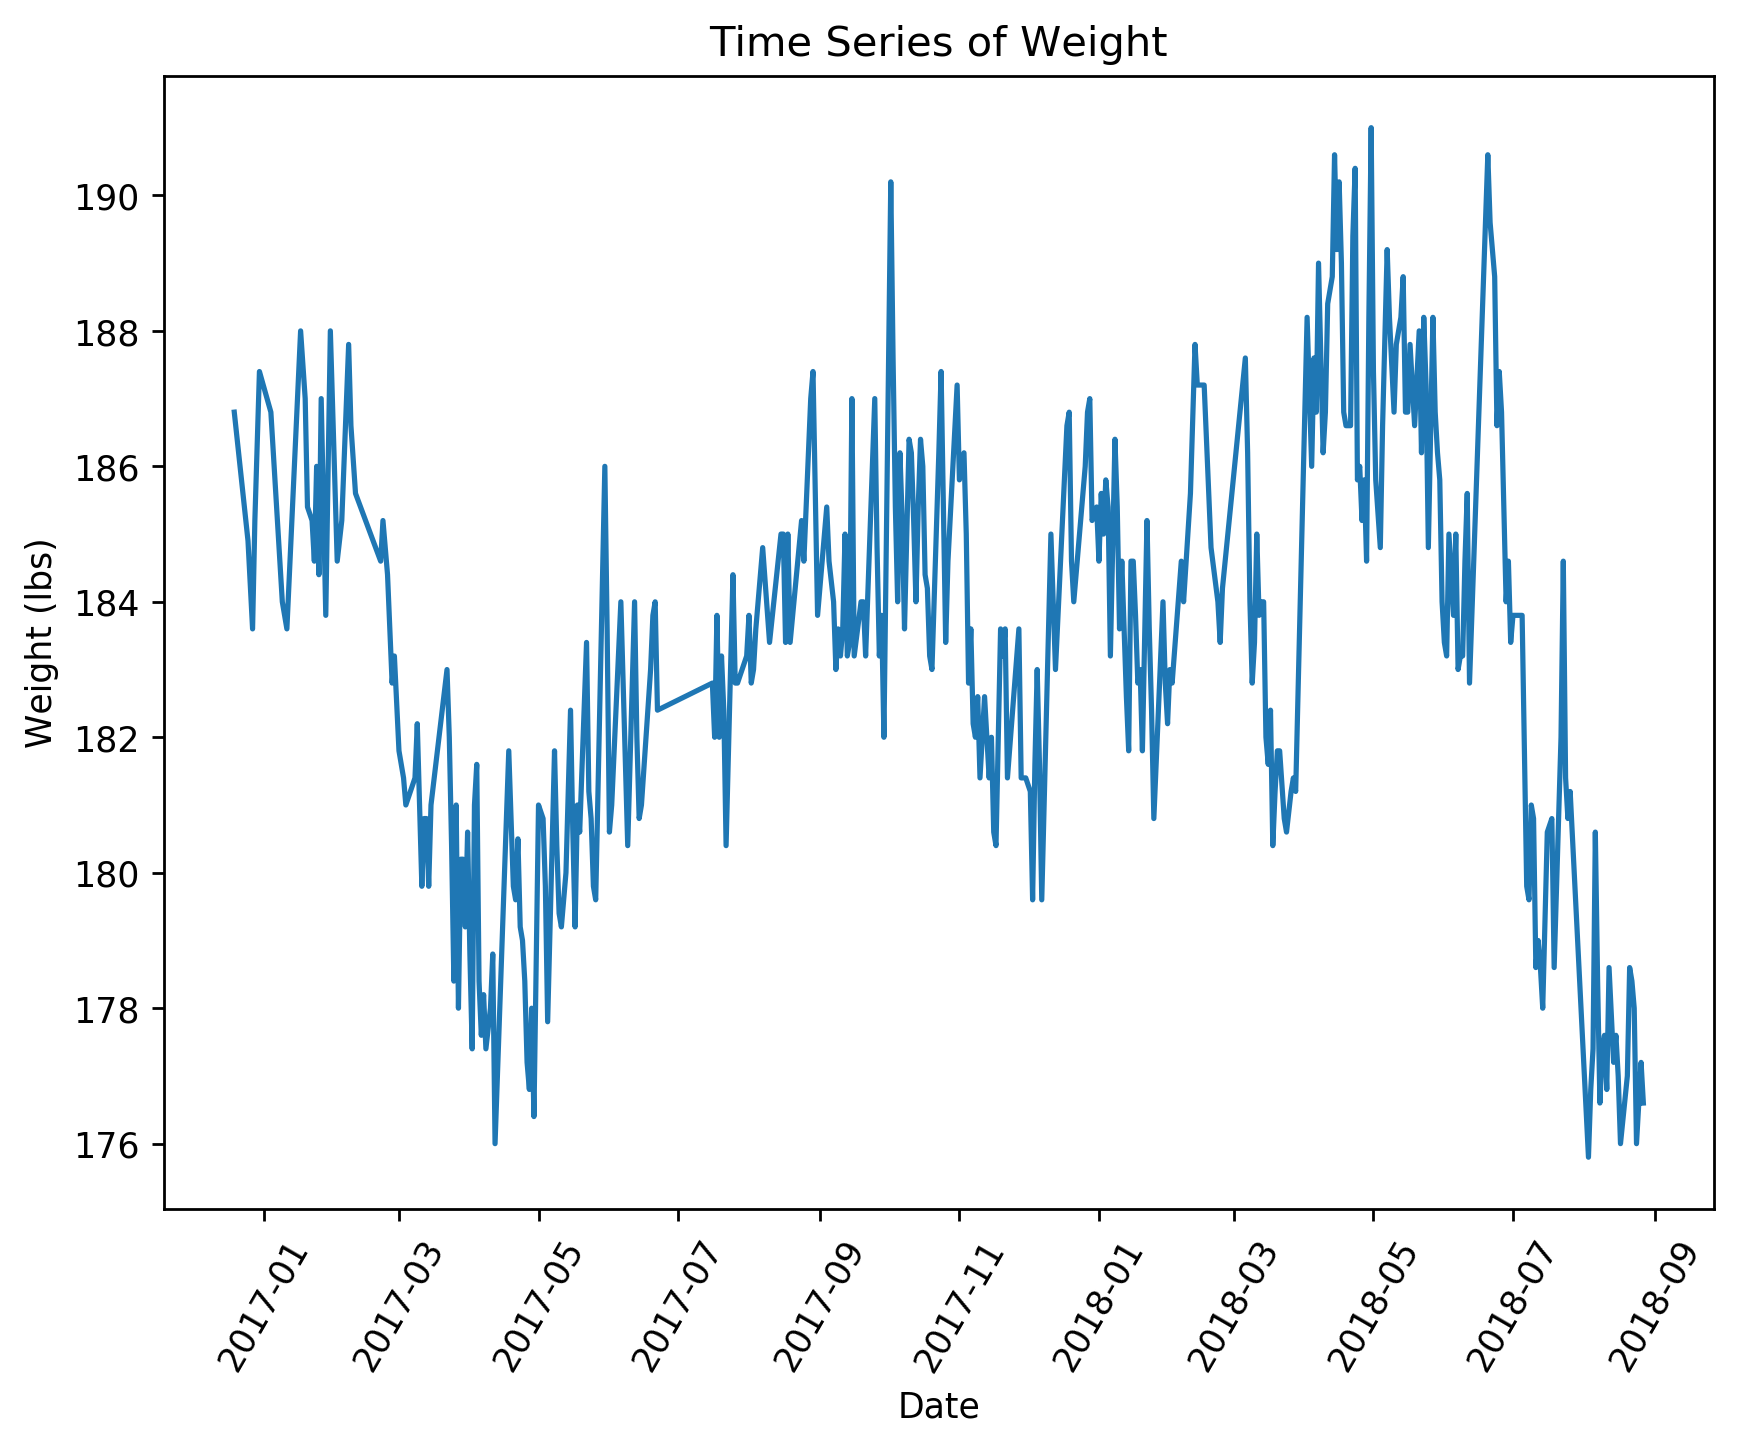

In [1067]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(fmfp_df.Date, fmfp_df.Weight);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight')

Text(0.5,1,'Time Series of Weight')

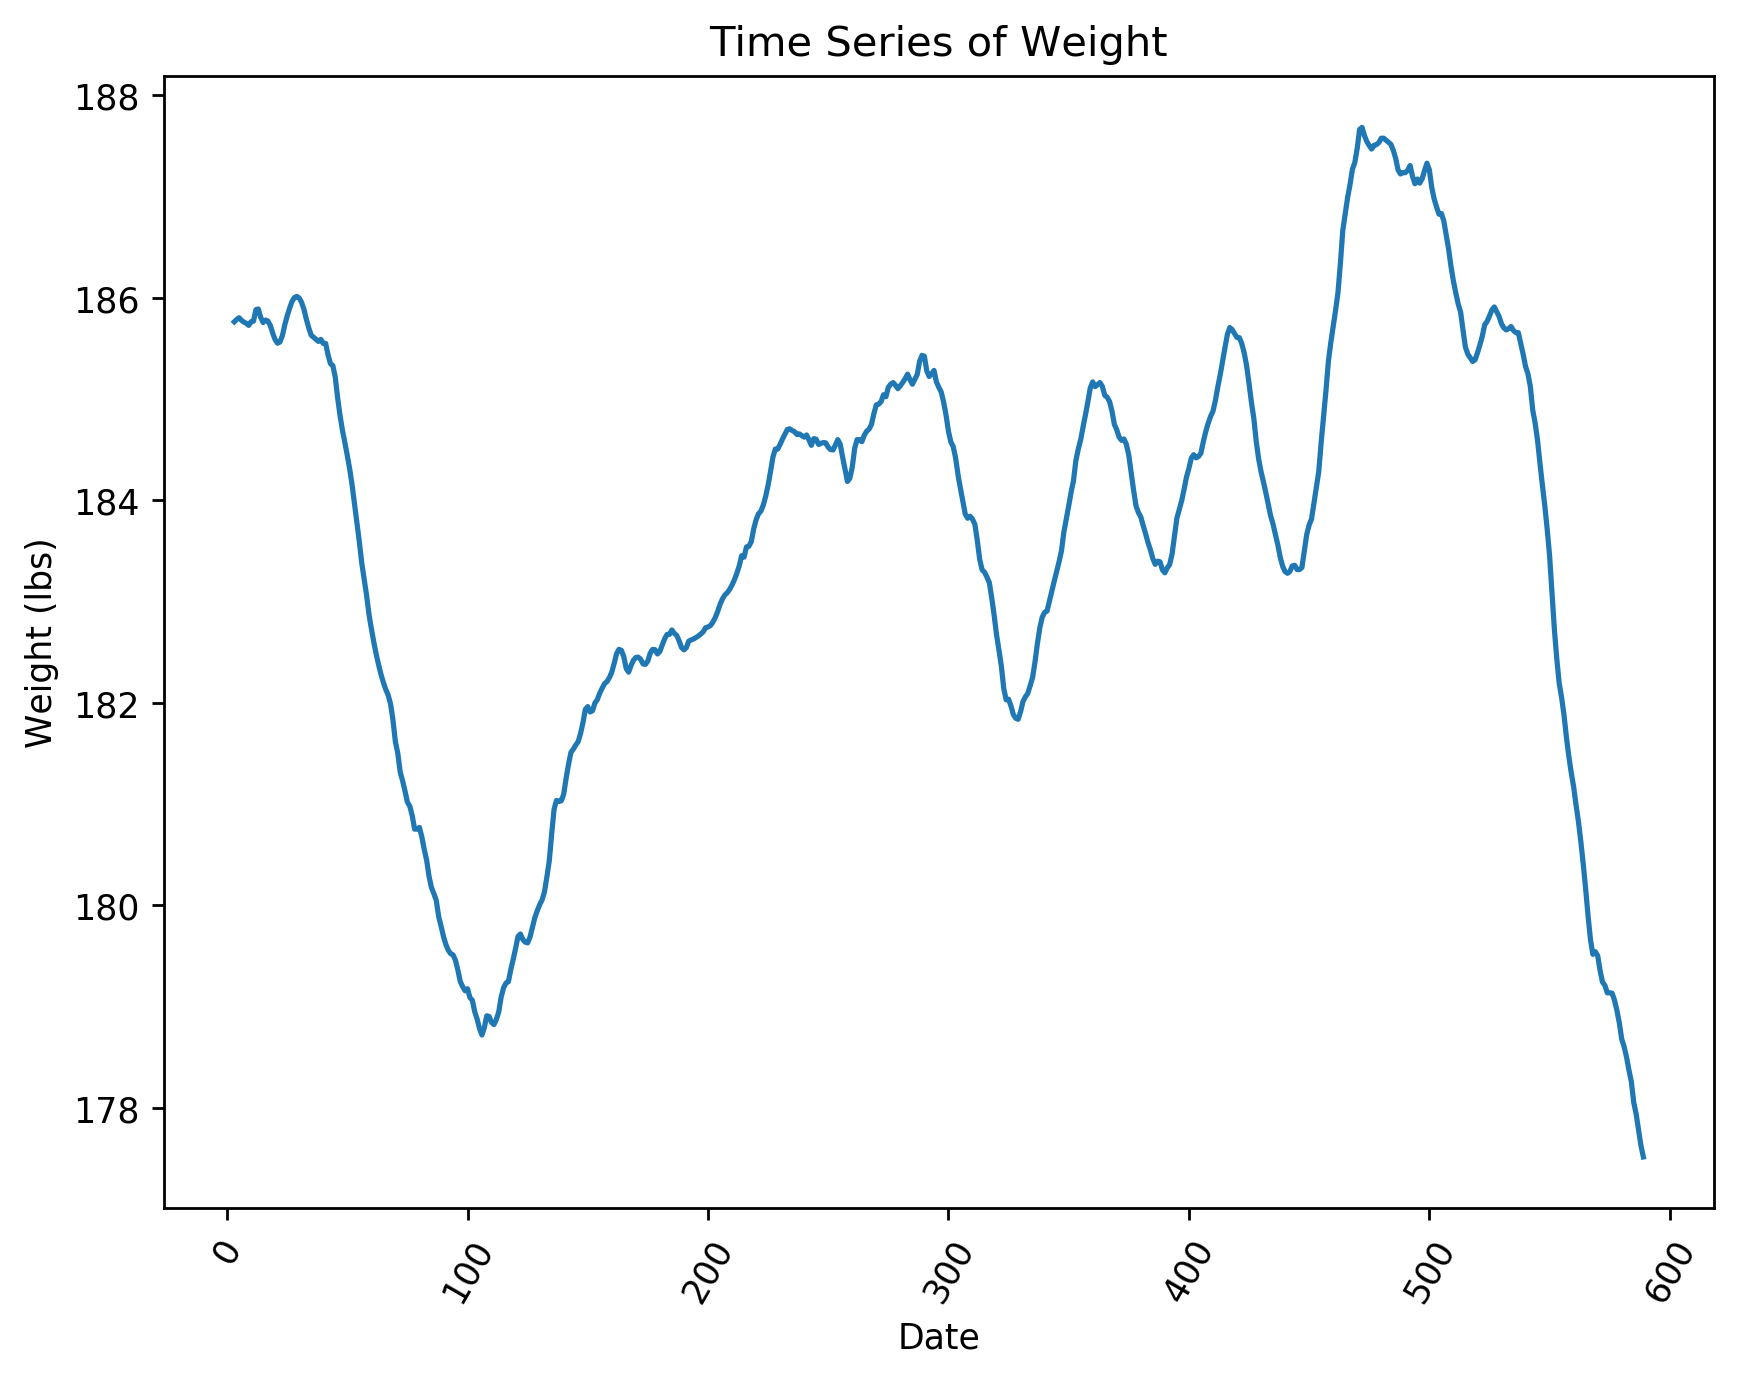

In [1068]:
from collections import deque
window = 30
weight_rolling = deque(fmfp_df.Weight[: window], maxlen=window)
smooth_weight = []

for w in fmfp_df.Weight[window:]:
    smooth_weight.append(np.mean(weight_rolling))
    weight_rolling.append(w)
    
figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

    
plt.plot(smooth_weight)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight')

In [1069]:
len(smooth_weight)

590

Text(0.5,1,'Time Series of Calorie Intake')

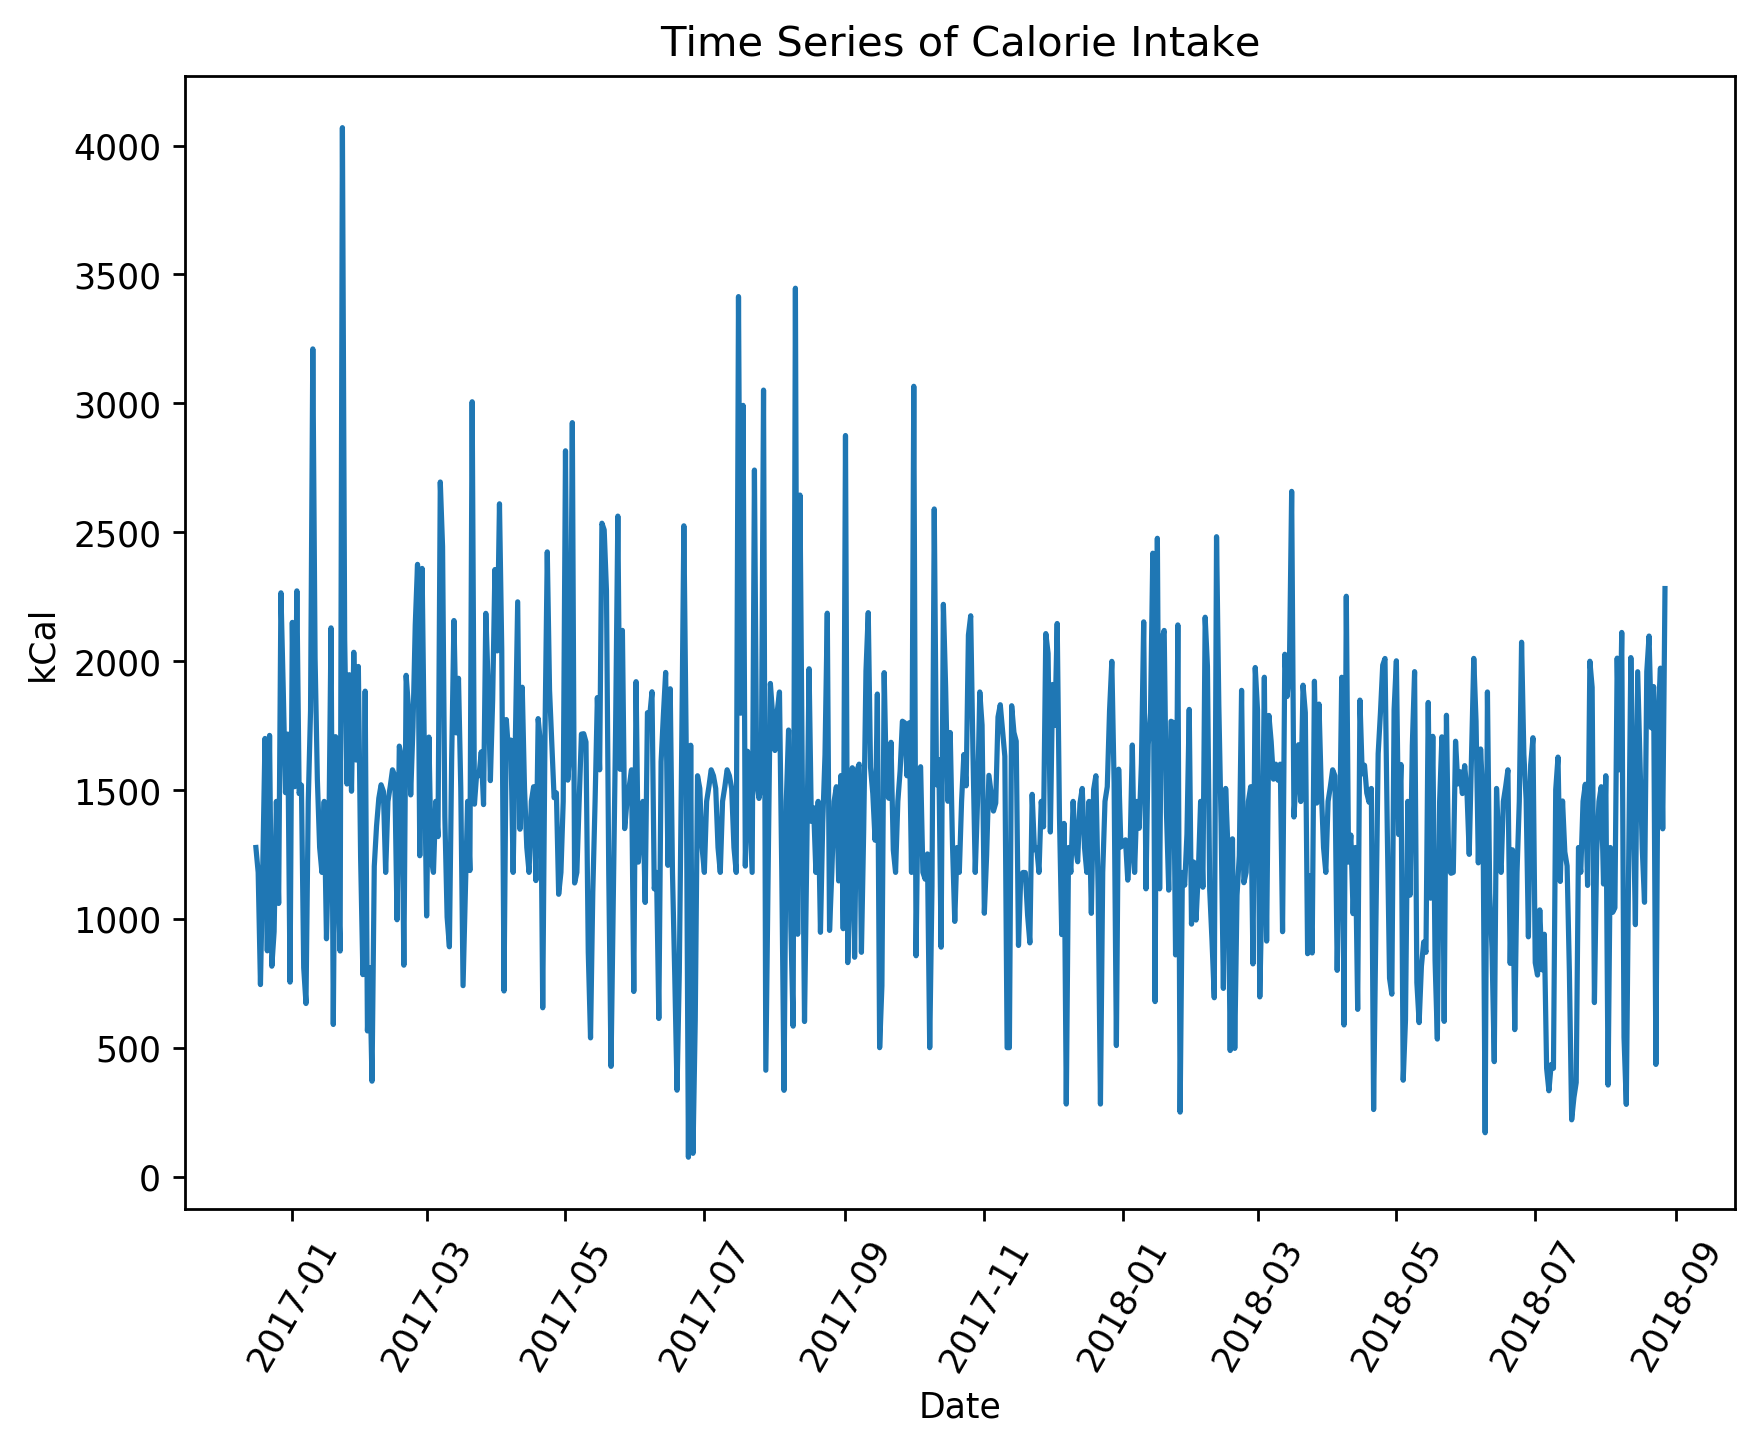

In [1070]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(fmfp_df.Date, fmfp_df.Calories);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('kCal')
plt.title('Time Series of Calorie Intake')

In [1071]:
## IMPUTE/FILLNA VALUES OF STEPS/NUTRITIONAL INFORMATION BASED ON DAY OF WEEK

## FILLNA OF INDIVIDUAL MEALS FIRST, THEN IF TOTAL CALORIES != SUM OF ALL MEALS, SET DAILY NUTRITIONAL
## INFO EQUAL TO THE SUM OF THE MEALS (SANS SNACKS)

In [1074]:
fmfp_df.set_index('Date', inplace=True)
fmfp_df["Weight_MA7"] = fmfp_df.Weight.rolling(window=7, center=True).mean()
fmfp_df["Weight_MA30"] = fmfp_df.Weight.rolling(window=30, center=True).mean()
fmfp_df.head(20)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Steps,Calories,Weight,Day_of_week,Weight_MA7,Weight_MA30
Date,,,,,,
2016-12-16,7949.359551,1276.622222,NaN,Friday,NaN,NaN
2016-12-17,5514.820225,1179.976923,NaN,Saturday,NaN,NaN
2016-12-18,4782.921348,744.800000,NaN,Sunday,NaN,NaN
2016-12-19,6743.966292,1194.900000,186.800000,Monday,NaN,NaN
2016-12-20,7318.181818,1699.700000,186.483333,Tuesday,NaN,NaN
2016-12-21,7112.386364,875.700000,186.166667,Wednesday,NaN,NaN
2016-12-22,7365.511364,1711.500000,185.850000,Thursday,185.850000,NaN
2016-12-23,7949.359551,816.100000,185.533333,Friday,185.485714,NaN
2016-12-24,5514.820225,950.000000,185.216667,Saturday,185.073810,NaN


Text(0.5,1,'Time Series of Weight (30 Day RWindow)')

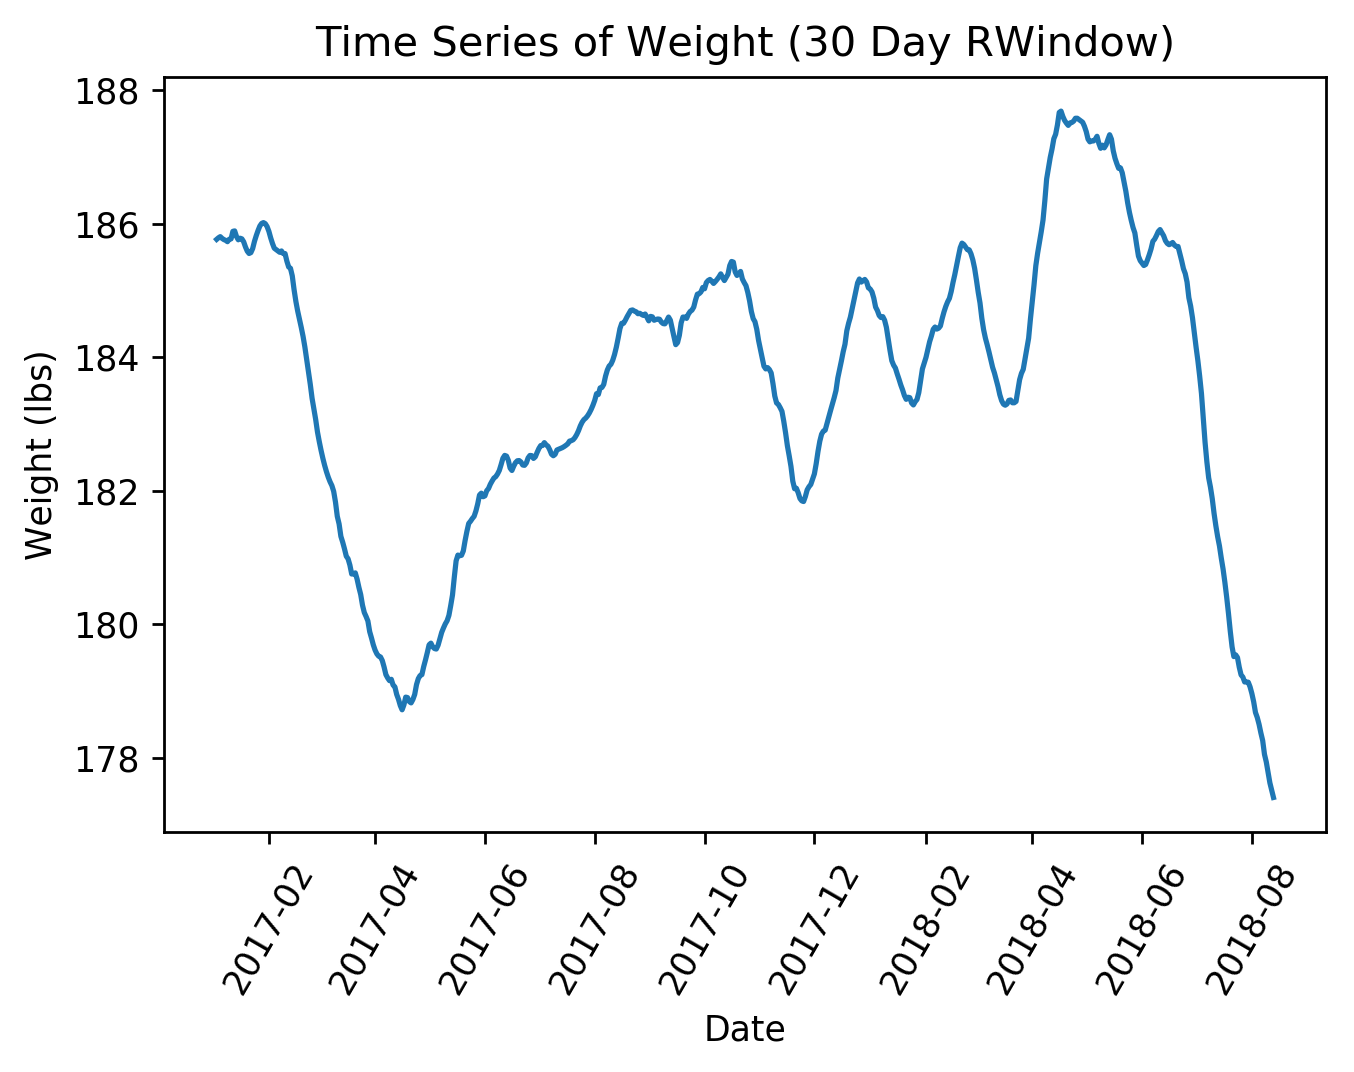

In [1075]:
plt.figure(dpi=250)
plt.plot(fmfp_df["Weight_MA30"])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight (30 Day RWindow)')